<a href="https://colab.research.google.com/github/BijayChodhoury/Machine-Learning/blob/main/Heart%20Disease%20Prediction/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
heart_data = pd.read_csv('/content/heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Analyzing the data

In [3]:
heart_data.shape

(1025, 14)

In [4]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Correlation

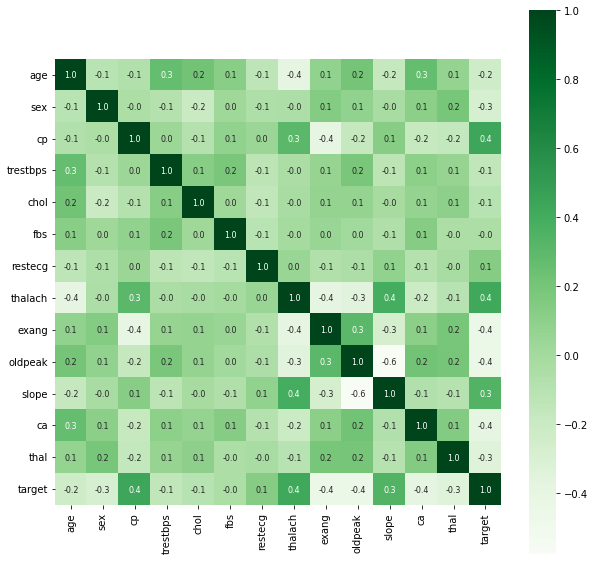

In [6]:
# Correlation between various features in the dataset
correlation = heart_data.corr()

# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

In [7]:
# Splitting the data
x = heart_data.drop(['target'], axis=1)
y = heart_data['target']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=2)

# Logistic regression

In [9]:
from sklearn.linear_model import LogisticRegression

# Model Training
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

# Model Evaluation: training data 
trian_data = model_lr.predict(x_train)
print("Accuracy on training data: ", accuracy_score(trian_data, y_train))

# Model Evaluation: test data 
test_data = model_lr.predict(x_test)
print("Accuracy on test data: ", accuracy_score(test_data, y_test))

Accuracy on training data:  0.8647140864714087
Accuracy on test data:  0.7922077922077922


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Support Vector Machine

In [10]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaler.fit(x)
std_data = scaler.transform(x)
x = std_data
# Again splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=2)

# Model Training
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

# Model Evaluation: Prediction on Training data
train_data = classifier.predict(x_train)
print("Accuracy on training data: ", accuracy_score(train_data, y_train))

# Model Evaluation: Prediction on Test data
test_data = classifier.predict(x_test)
print("Accuracy on test data: ", accuracy_score(test_data, y_test))

Accuracy on training data:  0.8702928870292888
Accuracy on test data:  0.7954545454545454


## XGBoost Regressor

In [11]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Model training
model_xgb = XGBRegressor()
model_xgb.fit(x_train, y_train)

# Model Evaluation: Prediction on Training data
train_data = model_xgb.predict(x_train)
print("Accuracy on Training data: ")
print("R square error: ", r2_score(y_train, train_data))
print("Mean Absolute Error: ", mean_absolute_error(y_train, train_data))

print('\n')

# Model Evaluation: Prediction on Test data
test_data = model_xgb.predict(x_test)
print("Accuracy on Test data: ")
print("R square error: ", r2_score(y_test, test_data))
print("Mean Absolute Error: ", mean_absolute_error(y_train, train_data))

[07:43:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy on Training data: 
R square error:  0.8709489604584858
Mean Absolute Error:  0.12644770654175572


Accuracy on Test data: 
R square error:  0.7421049418182752
Mean Absolute Error:  0.12644770654175572


# Prediction Systems For Each Model

### For Logistic Regression

In [12]:
def lr_predict(*input_data):
  # Changing the data into numpy array then reshape it to predict one instance only
  data_as_nparray = np.asarray(input_data)
  data_reshaped = data_as_nparray.reshape(1, -1)

  prediction = model_lr.predict(data_reshaped)
  if(prediction[0] == 0):
    print("This person does not have a heart disease")
  else:
    print("This person has a heart disease")

# Testing the Prediction system
lr_predict(51,1,0,140,298,0,1,122,1,4.2,1,3,3)

This person does not have a heart disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


### For Support Vector Machine

In [13]:
def svm_predict(*input_data):
  # Changing the data into numpy array then reshape it to predict one instance only
  data_as_nparray = np.asarray(input_data)
  data_reshaped = data_as_nparray.reshape(1, -1)
  std_data = scaler.transform(data_reshaped)

  prediction = classifier.predict(std_data)
  if(prediction[0] == 0):
    print("This person does not have a heart disease")
  else:
    print("This person has a heart disease")

# Testing the Prediction system
svm_predict(67,0,0,106,223,0,1,142,0,0.3,2,2,2)

This person has a heart disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


### For XGBoost Regressor

In [14]:
def xgb_predict(*input_data):
  # Changing the data into numpy array then reshape it to predict one instance only
  data_as_nparray = np.asarray(input_data)
  data_reshaped = data_as_nparray.reshape(1, -1)
  std_data = scaler.transform(data_reshaped)

  prediction = model_xgb.predict(std_data)
  if(prediction[0] == 0):
    print("This person does not have a heart disease")
  else:
    print("This person has a heart disease")

# Testing the Prediction system
xgb_predict(56,1,0,130,283,1,0,103,1,1.6,0,0,3)

This person has a heart disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


# AS WE CAN SEE SGBoost Regressor IS NOT PREDICTING THE TARGET OUTCOME CORRECTLY, HENCE WE CAN SAY THAT XGBoost Regressor IS NOT SUITABLE FOR CLASSIFIED ML PROBLEMS. XGBoost Regressor ALGORITHM IS GOOD FOR REGRESSION ML PROBLEMS.